In [1]:
import numpy as np
import statistics as stats
from scipy import stats as spstats
import seaborn as sns
sns.set(font_scale=1.2)
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Basics
* Range = max - min
* Midrange = average of max and min

In [2]:
a = np.random.randint(0, 1000, 5)
a = np.append(a, a[0])  # Repeat first element
a = np.append(a, 2000)  # Add outlier

In [3]:
range_ = np.ptp(a)
midrange = (np.max(a) + np.min(a)) / 2
avg = np.mean(a)
median = np.median(a)
mode = stats.mode(a)

print('sorted a: %s' % sorted(a))
print('range: %d, midrange: %f, avg: %f, median: %d, mode: %d' % (range_, midrange, avg, median, mode))

sorted a: [83, 618, 666, 666, 839, 911, 2000]
range: 1917, midrange: 1041.500000, avg: 826.142857, median: 666, mode: 666


## Notes:
* Mean is more sensitive to outliers than median
* There's no mode if multiple values occur most often
* Median won't change even if values other than the middle change

# IQR (Interquartile Range) & Outliers
* IQR = (median of the large half) - (median of small half)
* Outlier is either (outlier < Q1 - 1.5 x IQR) or (Q3 + 1.5 x IQR < outlier)

In [4]:
def get_iqr(a):
    a = sorted(a)
    len_a = len(a)
    if len_a % 2 == 0:
        half_point = int(len_a / 2)
        q25 = np.median(a[0: half_point])
        q75 = np.median(a[half_point: ])
    else:
        half_point = int((len_a - 1) / 2)
        q25 = np.median(a[0: half_point])
        q75 = np.median(a[half_point + 1: ])
    return q75 - q25

In [5]:
get_iqr(a)

293.0

## Numpy's implementation has different values!?
https://stackoverflow.com/questions/42838554/np-percentile-not-equal-to-quartiles

In [6]:
q75, q25 = np.percentile(a, (75 , 25))
iqr = q75 - q25
iqr

233.0

In [7]:
q75, q25 = np.percentile(a, (75 , 25), interpolation='midpoint')
iqr = q75 - q25
iqr

233.0

## Box Plot

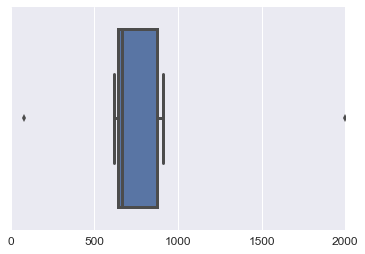

In [8]:
ax =sns.boxplot(x=a, linewidth=3)

# Variance, Standard Deviation, & Z-score
* Variance is the average of squared difference b/w each value and average
* Std = variance ^ (1/2)
* Z-score: how many standard deviation is the value away from the average?

In [9]:
var = np.var(a)
std = np.std(a)
print('variance: %f, standard deviation: %f' % (var, std))

variance: 290311.836735, standard deviation: 538.805936


## Notes:
* Standard Deviation goes with Mean (good for data without outliers)
* IQR goes with Median (good for data with outliers)
* Sample variance: divide by n - 1 instead of n

In [10]:
sample_var = np.var(a, ddof=1)
sample_std = np.std(a, ddof=1)
print('sample variance: %f, sample standard deviation: %f' % (sample_var, sample_std))

sample variance: 338697.142857, sample standard deviation: 581.976926


## Normal Distribution
* Early statisticians saw this curve repeatedly, and named it 'normal'
* 68-95-99.7 rule (% b/w -1 std and 1 std, -2 and 2, -3 and 3)
* Mean = median

## Skewed Distribution
* Skewed distribution is when mean and median are different
* Left-skewed distribution (long tail at left) has mean to the left of median

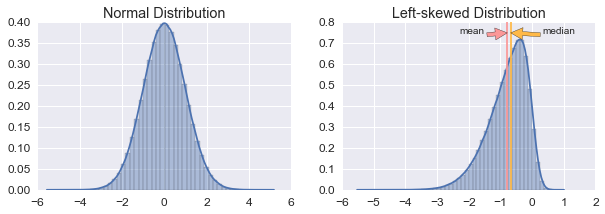

In [11]:
# Generate values
nd = np.random.normal(0, 1, 10**6)

ls = spstats.skewnorm.rvs(-5, size=10**6)
ls_mean = np.mean(ls)
ls_median = np.median(ls)

# Plot
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

sns.distplot(nd, ax=ax1)
ax1.set_title('Normal Distribution')

sns.distplot(ls, ax=ax2)
ax2.axvline(ls_mean, color='#fb9898')
ax2.axvline(ls_median, color='#FFB947')
ax2.annotate('mean', xy=(ls_mean, 0.75), xytext=(ls_mean-1.5, 0.75), 
             arrowprops=dict(facecolor='#fb9898'))
ax2.annotate('median', xy=(ls_median, 0.75), xytext=(ls_median+1, 0.75), 
             arrowprops=dict(facecolor='#FFB947'))
ax2.set_title('Left-skewed Distribution');

plt.show()

## Area under the curve with Normal Distribution

In [12]:
mean = 0
sd = 1

# Cumulative distribution function: given x_, find area under the curve where x <= x_
x_1 = 1.645
A_1 = spstats.norm.cdf(x=x_1, loc=mean, scale=sd)
print('Area under the curve up to x = %f: %f' % (x_1, A_1))

# Percent point function (inverse of cdf): Given A_, find x_ s.t. cdf(x_) = A
A_2 = 0.95
x_2 = spstats.norm.ppf(q=A_2, loc=mean, scale=sd)
print('x which area under the curve up to is %f: %f' % (A_2, x_2))

Area under the curve up to x = 1.645000: 0.950015
x which area under the curve up to is 0.950000: 1.644854


# MAD (Mean Absolute Deviation)
* MAD is the average of absolute difference b/w each value and average

In [13]:
def get_mad(a):
    avg = np.mean(a)
    return np.mean(np.absolute(a - avg))

In [14]:
get_mad(a)

363.30612244897958

# Correlation & Covariance
* Correlation of two variables, x and y, is the average of the product of xi's z-score and yi's z-score
* Between -1 and 1
* Absolute value is the strength, 1 being stongest, meaning a line goes through all points
* Sign is the direction of the line (slope)


* Covariance of two variables, x and y, is the average of the product of (xi - xmean) and (yi - ymean)
* Sign is the direction of the line (slope)

correlation coefficient: 0.783670, covariance: 810.689744


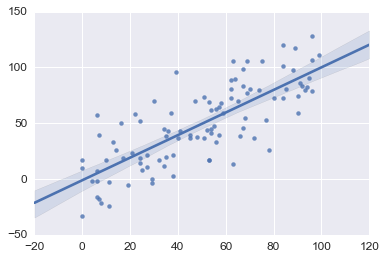

In [15]:
x = np.random.randint(0, 100, 100)
y = x + np.random.normal(0, 25, 100)  # x with some noise

r, p = spstats.pearsonr(x, y)
c = np.cov(x, y)[0][1]

print('correlation coefficient: %f, covariance: %f' % (r, c))
ax =sns.regplot(x=x, y=y)

# AB Test
Find sample size n given...
* Sample mean from Group A (population group)
* Sample mean from Group B (alternative group)
* Significance level (default 5%)
* Power (default 80%)

https://www.quora.com/How-should-I-determine-minimum-sample-size-for-a-site-A-B-test

In [16]:
def get_min_sample_size(mean_pop, mean_alt, sig_level=0.05, power=0.8):
    z_reliability = spstats.norm.ppf(1 - sig_level)
    z_power = abs(spstats.norm.ppf(1 - power))
    
    first_part = mean_pop * (1 - mean_pop) + mean_alt * (1 - mean_alt)
    second_part = ((z_reliability + z_power) / (mean_pop - mean_alt)) ** 2
    
    return math.ceil(first_part * second_part)

In [17]:
mean_pop = 0.1
mean_alt = 0.15
sig_level=0.05
power=0.8

n = get_min_sample_size(mean_pop, mean_alt, sig_level, power)

print('To get a statistically significant result with significance level of %d%% \
and power of %d%%, given population mean %.2f and alternative group\'s mean %.2f, \
minimum sample size needed is %d.' % (sig_level*100, power*100, mean_pop, mean_alt, n))

To get a statistically significant result with significance level of 5% and power of 80%, given population mean 0.10 and alternative group's mean 0.15, minimum sample size needed is 538.


In [18]:
print('z-score for 5%% significance level: %f' % (spstats.norm.ppf(1 - 0.05)))
print('z-score for 80%% power: %f' % (abs(spstats.norm.ppf(1 - 0.8))))

z-score for 5% significance level: 1.644854
z-score for 80% power: 0.841621
